In [107]:
import glob
import pandas as pd
import numpy as np
import os
import sklearn.metrics

In [108]:
import pickle

In [109]:
import pandas as pd
 
EngelTable = pd.read_excel('/home/hfw/Retro/datasets/Surgical outcome TVB 2018.xlsx', sheet_name='VEP surgical outcome')
 
print("Column headings:")
print(EngelTable.columns)

Column headings:
Index(['Patient ID TVB', 'Patient Name', 'Surgical outcome (Engel class)'], dtype='object')


In [10]:
import json
with open(f'./data/ei-vep.json','r') as f:
        ezh_all = json.load(f)

In [77]:
def prec_recl(ezh, vep, vt=0.1):
    """Compute precision and recall, for "truth" `ezh`, score `vep` and threshold `vt`"""
    tp = ezh.astype(bool) & (vep > vt)
    fp = ~ezh.astype(bool) & (vep > vt)
    fn = ezh.astype(bool) & ~(vep > vt)
    prec = tp.sum() / (tp.sum() + fp.sum())
    recl = tp.sum() / (tp.sum() + fn.sum())
    return format(prec, '.2f'), format(recl, '.2f')

In [11]:
pidlist=[pid for pid in ezh_all.keys()]

In [19]:
pkl_file = open(f'/home/hfw/Retro/results/id001_bt/VEP/meanVepC.pickle', 'rb')
mydict2 = pickle.load(pkl_file)

In [22]:
vepr = (mydict2['VEP']>mydict2['theshold']).astype(int)

In [81]:
#build the tables:Patients ID, Engel, TP/FN/FP 
df_Engel_TPN = pd.DataFrame(columns=['Patients_ID', 'Engel', 'TP','FP','FN','TPR','FDR','FNR','PPV','FN+FP','AUC','Prec','Rec'])
for idrow,sub_id in enumerate(pidlist):
    print(sub_id)
    pkl_file = open(f'/home/hfw/Retro/results/{sub_id}/VEP/meanVepC.pickle', 'rb')
    mydict2 = pickle.load(pkl_file)
    vepr = (mydict2['VEP']>mydict2['theshold']).astype(int)
    
    i_ez=ezh_all[sub_id]['i_ez']
    ezhs_pid=np.zeros(np.shape(vepr))
    ezhs_pid[i_ez]=1
    
    TP=int(sum(vepr*ezhs_pid))
    FP=sum(vepr-ezhs_pid==1)
    FN=sum((ezhs_pid-vepr)==1)
    P=sum(ezhs_pid)
    TPR=float(TP)/P
    FDR=float(FP)/float(FP+TP)
    FNR=float(FN)/P
    PPV=float(TP)/float(FP+TP)
    FPN=FP+FN
    
    prec, rec = prec_recl(ezhs_pid, vepr, vt=0.1)
    
    auc_per = sklearn.metrics.roc_auc_score(ezhs_pid, mydict2['VEP'])
    
    Engel=EngelTable.loc[EngelTable['Patient ID TVB'] == sub_id, 'Surgical outcome (Engel class)'].iloc[0]
    
    df_Engel_TPN.loc[idrow] = [sub_id,Engel,TP,FP,FN,TPR,FDR,FNR,PPV,FPN,auc_per,prec,rec]

id001_bt
id003_mg
id004_bj
id007_rd
id010_cmn
id013_lk
id014_vc
id017_mk
id020_lma
id021_jc
id022_te
id023_br
id025_mc
id027_sj
id028_ca
id030_bf
id033_fc
id036_dm
id037_cg
id039_mra
id040_ms
id050_sx
id008_dmc


In [40]:
!ls /home/hfw/Retro/results/id003_mg/VEP/


meanVepC.pickle


In [82]:
df_Engel_TPN

,Patients_ID,Engel,TP,FP,FN,TPR,FDR,FNR,PPV,FN+FP,AUC,Prec,Rec
0,id001_bt,II,2,1,1,0.666667,0.333333,0.333333,0.666667,2,0.803983,0.67,0.67
1,id003_mg,I,1,5,5,0.166667,0.833333,0.833333,0.166667,10,0.642094,0.17,0.17
2,id004_bj,I,1,8,1,0.500000,0.888889,0.500000,0.111111,9,0.693750,0.11,0.50
3,id007_rd,III,1,5,2,0.333333,0.833333,0.666667,0.166667,7,0.793501,0.17,0.33
4,id010_cmn,I,2,0,2,0.500000,0.000000,0.500000,1.000000,2,0.855222,1.00,0.50
5,id013_lk,I,1,0,2,0.333333,0.000000,0.666667,1.000000,2,0.658281,1.00,0.33
6,id014_vc,I,3,0,3,0.500000,0.000000,0.500000,1.000000,3,0.819444,1.00,0.50
7,id017_mk,I,3,0,4,0.428571,0.000000,0.571429,1.000000,4,0.758986,1.00,0.43
8,id020_lma,I,2,2,1,0.666667,0.500000,0.333333,0.500000,3,0.822851,0.50,0.67
9,id021_jc,II,2,0,1,0.666667,0.000000,0.333333,1.000000,1,0.832285,1.00,0.67


In [104]:
EngelIItable=df_Engel_TPN[['Patients_ID', 'Engel','FDR','FN+FP','FP','AUC','Prec','Rec']].copy()

EngelIItable.loc[:,'EngelII']=pd.Series(EngelIItable['Engel'])

EngelIItable['EngelII'][EngelIItable['Engel'] == 'I']='Seizure free'

EngelIItable['EngelII'][EngelIItable['Engel'] != 'I']='Not Seizure free'

/opt/conda/envs/jhub/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/envs/jhub/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [105]:
EngelIItable

,Patients_ID,Engel,FDR,FN+FP,FP,AUC,Prec,Rec,EngelII
0,id001_bt,II,0.333333,2,1,0.803983,0.67,0.67,Not Seizure free
1,id003_mg,I,0.833333,10,5,0.642094,0.17,0.17,Seizure free
2,id004_bj,I,0.888889,9,8,0.693750,0.11,0.50,Seizure free
3,id007_rd,III,0.833333,7,5,0.793501,0.17,0.33,Not Seizure free
4,id010_cmn,I,0.000000,2,0,0.855222,1.00,0.50,Seizure free
5,id013_lk,I,0.000000,2,0,0.658281,1.00,0.33,Seizure free
6,id014_vc,I,0.000000,3,0,0.819444,1.00,0.50,Seizure free
7,id017_mk,I,0.000000,4,0,0.758986,1.00,0.43,Seizure free
8,id020_lma,I,0.500000,3,2,0.822851,0.50,0.67,Seizure free
9,id021_jc,II,0.000000,1,0,0.832285,1.00,0.67,Not Seizure free


In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import median
from scipy import stats

In [95]:
def plot_twoSF(EngelIItable,KeyPlot='FN+FP'):
    plotdata=EngelIItable.copy()
    plotdata[KeyPlot]=plotdata[KeyPlot].astype(float)
    fig, ax = plt.subplots(figsize = (10,5))
    ax=sns.violinplot(x='EngelII', y=KeyPlot, data=plotdata, 
                     order=['Seizure free','Not Seizure free'],inter=None,color='moccasin',linewidth=0.1)
    ax1=sns.pointplot(x='EngelII', y=KeyPlot, data=plotdata, 
                     order=['Seizure free','Not Seizure free'],
                     estimator=median, markers='x')

    ax=sns.swarmplot(x='EngelII', y=KeyPlot, data=plotdata, 
                     order=['Seizure free','Not Seizure free'])
    ax.set_xlabel('Surgical outcome (Engel class)')
    ax.set_ylabel(f"{KeyPlot}")
    NPatients=len(plotdata['Patients_ID'])
    SFvalue=EngelIItable[KeyPlot][EngelIItable['EngelII']=='Seizure free'].tolist()
    SNFvalue=EngelIItable[KeyPlot][EngelIItable['EngelII']=='Not Seizure free'].tolist()
    tstat,pvalue=stats.mannwhitneyu(SFvalue,SNFvalue)
    pvalue=format(pvalue, '.2f')
    ax.set_title(f'{KeyPlot} values in a function of Engel class for {NPatients} patients,\n P_value is {pvalue}',fontsize=14)
    plt.savefig(f'/home/hfw/Retro/results/{KeyPlot}4EngelII.png')

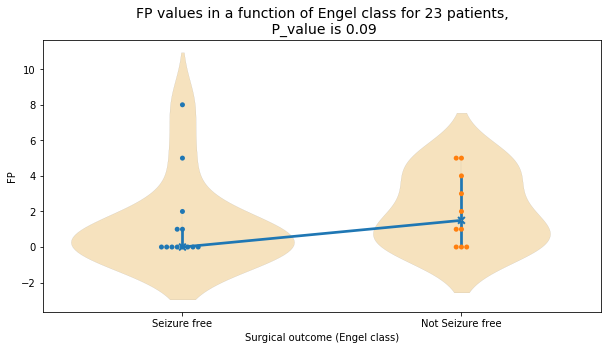

In [96]:
plot_twoSF(EngelIItable,KeyPlot='FP')

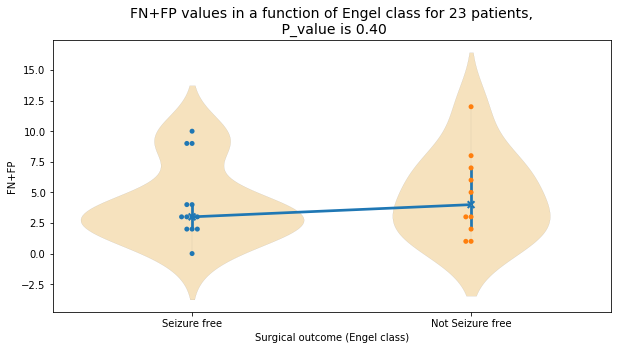

In [98]:
plot_twoSF(EngelIItable,KeyPlot='FN+FP')

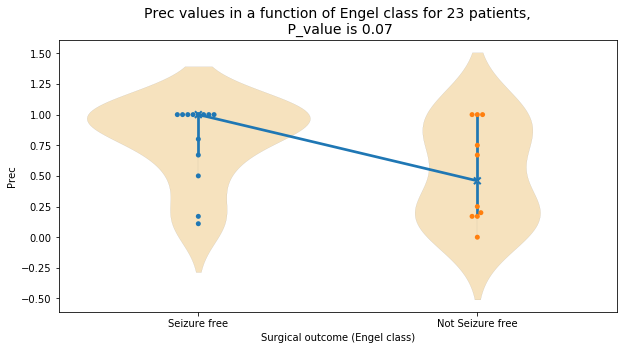

In [99]:
plot_twoSF(EngelIItable,KeyPlot='Prec')


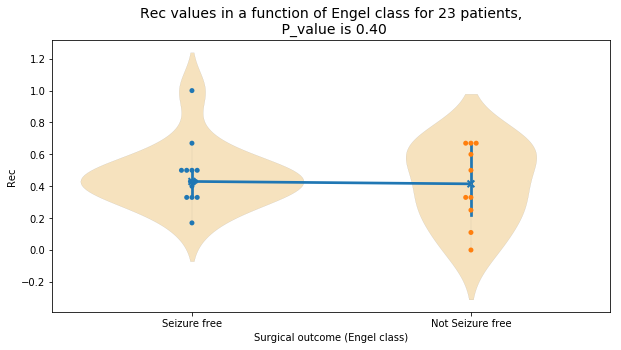

In [102]:
plot_twoSF(EngelIItable,KeyPlot='Rec')

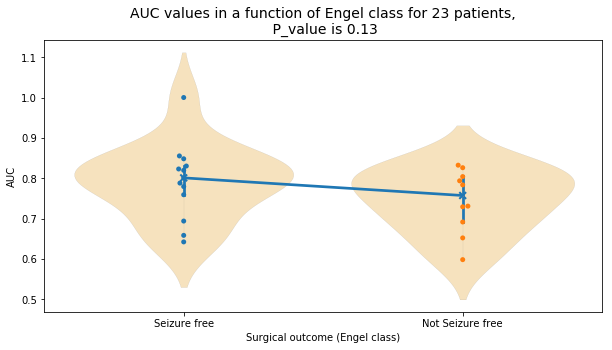

In [103]:
plot_twoSF(EngelIItable,KeyPlot='AUC')

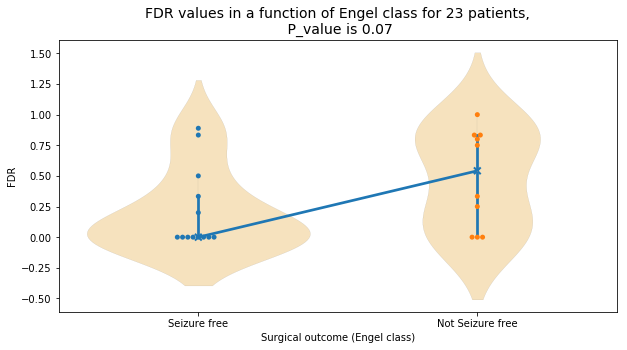

In [106]:
plot_twoSF(EngelIItable,KeyPlot='FDR')